# Actividad práctica 

### Instrucciones
- Escriba las rutinas de Python necesarias para resolver los problemas de cada punto
- Siga las instrucciones y conteste donde se pida
- Entregue el notebook con sus respuestas al correo: phuijse@inf.uach.cl
- El trabajo es individual

### Introducción
En esta actividad usaremos la base de datos [*Auto Milles per Gallon Data Set*](https://archive.ics.uci.edu/ml/datasets/auto+mpg) del repositorio UCI

Puede descargarla usando el siguiente bloque

In [1]:
#%%bash
#wget -O auto.csv -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data-original 
#wget -O README -c https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names 

### Información preliminar

1. Use las herramientas de UNIX para leer el archivo README en el notebook
1. Responda ¿Cuántos y cuáles son los atributos (características)? ¿De qué tipo es cada uno?
1. Responda ¿Cuantas instancias/ejemplos existen?


In [2]:
%%bash
cat README

1. Title: Auto-Mpg Data

2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University. The dataset was 
                used in the 1983 American Statistical Association Exposition.
   (c) Date: July 7, 1993

3. Past Usage:
    -  See 2b (above)
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.

4. Relevant Information:

   This dataset is a slightly modified version of the dataset provided in
   the StatLib library.  In line with the use by Ross Quinlan (1993) in
   predicting the attribute "mpg", 8 of the original instances were removed 
   because they had unknown values for the "mpg" attribute.  The original 
   dataset is available in the file "auto-mpg.data-original".

   "The data concerns city-cycle fuel consumptio

## R:
__Total atributos__: 9
Atributos:

|  Atributo | Tipo  | 
|---|---|
| mpg |  continuo |
| cylinders  | discreto multivariable  |
|  displacement |  continuo |
| horsepower  |  continuo |
| weight |  continuo |
| acceleration |  continuo |
| model year  |  discreto multivariable |
| origin  |  discreto multivariable |
| car name  |  string (unico por cada instancia) |

Contiene un total de __398__ instancias.

### Lectura de datos

1. Cree un `DataFrame` a partir de `auto.csv` 
    1. Use una columna por atributo* 
    1. Use los nombres de columna descritos en `README` 
1. Imprima las primeras 5 filas del dataframe

**HINT:** Verifique el uso  del argumento `delim_whitespace`*

In [3]:
import pandas as pd
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display

In [4]:
head = ["mpg","cylinders","displacement","horsepower","weight","acceleration","model_year","origin","car_name"]
df = pd.read_csv('auto.csv',delim_whitespace=True,names=head)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino


### Manipulación de columnas 

1. Convierta las columnas *cylinders*, *year* y *origin* a valores enteros
1. Reemplace los valores $[1, 2, 3]$ de *origin* por *USA*, *Europe*, *Japan*, respectivamente
1. Convierta los valores de la columna *mpg* (galones por milla) a kmpl (kilómetros por litro)
1. Convierta los valores de la columna peso de libras (*pounds*) a kilogramos
1. Modifique el nombre de la columna *mpg* a kmpl


In [5]:
#1
df=df.astype({"cylinders":np.int16,"model_year":np.int16,"origin":np.int16})
#2
df["origin"] = df["origin"].apply(lambda i: ["USA","Europe","Japan"][i-1])
#3
df["mpg"] = df["mpg"]*0.354
#4
df["weight"] = df["weight"]*0.425144
#5
df=df.rename(columns = {'mpg':'kmpl'})
df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,6.372,8,307.0,130.0,1489.704576,12.0,70,USA,chevrolet chevelle malibu
1,5.310,8,350.0,165.0,1570.056792,11.5,70,USA,buick skylark 320
2,6.372,8,318.0,150.0,1460.794784,11.0,70,USA,plymouth satellite
3,5.664,8,304.0,150.0,1459.519352,12.0,70,USA,amc rebel sst
4,6.018,8,302.0,140.0,1466.321656,10.5,70,USA,ford torino


### Datos perdidos

1. Encuentre los nombres de los autos que tengan valores perdidos (*missing data*)
1. Encuentre los nombres de los atributos que tengan valores perdidos
1. Elimines las filas con atributos perdidos ¿Cuántas filas quedan en el dataframe?

In [6]:
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.any.html
#1
df[df.isnull().any(axis=1)]

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
10,NaN,4,133.0,115.0,1313.694960,17.5,70,Europe,citroen ds-21 pallas
11,NaN,8,350.0,165.0,1760.946448,11.5,70,USA,chevrolet chevelle concours (sw)
12,NaN,8,351.0,153.0,1715.030896,11.0,70,USA,ford torino (sw)
13,NaN,8,383.0,175.0,1771.149904,10.5,70,USA,plymouth satellite (sw)
14,NaN,8,360.0,175.0,1636.804400,11.0,70,USA,amc rebel sst (sw)
17,NaN,8,302.0,140.0,1425.507832,8.0,70,USA,ford mustang boss 302
38,8.8500,4,98.0,NaN,869.844624,19.0,71,USA,ford pinto
39,NaN,4,97.0,48.0,840.934832,20.0,71,Europe,volkswagen super beetle 117
133,7.4340,6,200.0,NaN,1222.289000,17.0,74,USA,ford maverick
337,14.4786,4,85.0,NaN,780.139240,17.3,80,Europe,renault lecar deluxe


In [7]:
#2
df[df.isnull().any(axis=1)].count()

kmpl             6
cylinders       14
displacement    14
horsepower       8
weight          14
acceleration    14
model_year      14
origin          14
car_name        14
dtype: int64

In [8]:
#3
indices = df[df.isnull().any(axis=1)].index #indices de filas con valores nulos
df.drop(indices,axis=0,inplace=True)
df

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,6.372,8,307.0,130.0,1489.704576,12.0,70,USA,chevrolet chevelle malibu
1,5.310,8,350.0,165.0,1570.056792,11.5,70,USA,buick skylark 320
2,6.372,8,318.0,150.0,1460.794784,11.0,70,USA,plymouth satellite
3,5.664,8,304.0,150.0,1459.519352,12.0,70,USA,amc rebel sst
4,6.018,8,302.0,140.0,1466.321656,10.5,70,USA,ford torino
5,5.310,8,429.0,198.0,1845.550104,10.0,70,USA,ford galaxie 500
6,4.956,8,454.0,220.0,1851.076976,9.0,70,USA,chevrolet impala
7,4.956,8,440.0,215.0,1833.220928,8.5,70,USA,plymouth fury iii
8,4.956,8,455.0,225.0,1881.262200,10.0,70,USA,pontiac catalina
9,5.310,8,390.0,190.0,1636.804400,8.5,70,USA,amc ambassador dpl


### Multi-índice

1. Cree un dataframe con dos columnas a partir del atributo "*car name*"
    1. La primera columna debe tener la primera palabra del string en *car name**
    1. La segunda columna debe tener el resto del string en *car name*
1. Elimine la columna *car name* del dataframe y agregue estas nuevas columnas llamándolas *brand* y *model*, respectivamente
1. ¿Cuántas marcas (*brand*) únicas existan? ¿Existen columnas repetidas o mal escritas? Mencione cuales y corrijalas**
1. Cree un multi-índice que utilice como primera llave a *brand* y como segunda a *model*
1. Muestre los autos con marca *Mazda*
1. Usando groupby cuente la cantidad de modelos por marca

**HINT:** Verifique el uso de `.str.split()`* y `str.replace()`**

In [9]:
#1A

def get_car_brand(text):
    brand = text.split(' ')[0]
    if(brand in ['chevroelt','chevy'] ):
        brand = 'chevrolet'
    
    elif(brand in ['bmw','chevy'] ):
        brand = 'chevrolet'
    
    elif(brand in ['maxda']):
        brand = 'mazda'
    
    elif(brand in ['mercedes']):
        brand = 'mercedes-benz'
    
    elif(brand in ['vw','vokswagen']):
        brand = 'volkswagen'
    
    elif(brand in ['toyouta']):
        brand = 'toyota'
    
    return brand

df = df.copy()
df['brand']=df['car_name'].apply(get_car_brand)
#1B
df['model']=df['car_name'].apply(lambda i:" ".join(i.split(' ')[1:]))
#2
df.drop(['car_name'],inplace=True,axis=1)

df.head()

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,brand,model
0,6.372,8,307.0,130.0,1489.704576,12.0,70,USA,chevrolet,chevelle malibu
1,5.310,8,350.0,165.0,1570.056792,11.5,70,USA,buick,skylark 320
2,6.372,8,318.0,150.0,1460.794784,11.0,70,USA,plymouth,satellite
3,5.664,8,304.0,150.0,1459.519352,12.0,70,USA,amc,rebel sst
4,6.018,8,302.0,140.0,1466.321656,10.5,70,USA,ford,torino


In [10]:
#3
unique_brands = len(df.groupby('brand').sum())
print("Total marcas unicas: {0}".format(unique_brands))
#display(df.groupby('brand').sum().index)

Total marcas unicas: 29


In [11]:
#4
df=df.reset_index()
df.set_index(['brand','model'],inplace=True)
df.drop(columns=['index'],inplace=True)
df.sort_index(inplace=True)
df.head()

kmpl  cylinders  displacement  horsepower  \
brand model                                                              
amc   ambassador brougham  4.6020          8         360.0       175.0   
      ambassador dpl       5.3100          8         390.0       190.0   
      ambassador sst       6.0180          8         304.0       150.0   
      concord              6.8676          6         232.0        90.0   
      concord              8.6022          4         151.0        90.0   

                                weight  acceleration  model_year origin  
brand model                                                              
amc   ambassador brougham  1624.475224          11.0          73    USA  
      ambassador dpl       1636.804400           8.5          70    USA  
      ambassador sst       1561.128768          11.5          72    USA  
      concord              1364.712240          17.2          78    USA  
      concord              1276.707432          20.1          80    USA

In [12]:
#5
df.loc['mazda']

,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
626,11.0802,4,120.0,75.0,1080.716048,17.5,80,Japan
626,11.1864,4,120.0,74.0,1120.254440,18.3,81,Japan
glc,16.4964,4,86.0,65.0,897.053840,17.9,80,Japan
glc 4,12.0714,4,91.0,68.0,843.910840,16.0,81,Japan
glc custom,10.9740,4,91.0,68.0,837.533680,17.6,82,Japan
glc custom l,13.0980,4,91.0,68.0,860.916600,18.2,82,Japan
glc deluxe,11.6112,4,78.0,52.0,843.910840,19.4,78,Japan
glc deluxe,12.0714,4,86.0,65.0,839.659400,15.2,79,Japan
rx-4,7.6110,3,80.0,110.0,1156.391680,13.5,77,Japan


In [13]:
#6
df.groupby(['brand']).size()

brand
amc              27
audi              7
buick            17
cadillac          2
capri             1
chevrolet        49
chrysler          6
datsun           23
dodge            28
fiat              8
ford             48
hi                1
honda            13
mazda            12
mercedes-benz     3
mercury          11
nissan            1
oldsmobile       10
opel              4
peugeot           8
plymouth         31
pontiac          16
renault           3
saab              4
subaru            4
toyota           26
triumph           1
volkswagen       22
volvo             6
dtype: int64

### Buscando autos

1. Por cada marca encuentre el auto más antiguo y el más nuevo
1. Por cada marca encuentre el auto más pesado y el más liviano
1. Por cada marca encuentre los autos con mayor y menor caballos de fuerza, respectivamente
1. Por cada marca encuentre los autos con menor y mayor desempeño en términos de kmpl, respectivamente

In [14]:
#1
idx = pd.IndexSlice
for brand in df.index.get_level_values('brand').unique():
    tmp_df = df.loc[idx[brand],:]
    min_year = tmp_df['model_year'].min()
    max_year = tmp_df['model_year'].max()
    print("{0} - antiguo".format(brand))
    display(tmp_df.query('model_year == {0}'.format(min_year)))
    print("{0} - nuevo".format(brand))
    display(tmp_df.query('model_year == {0}'.format(max_year)))
    
    

amc - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ambassador dpl,5.310,8,390.0,190.0,1636.804400,8.5,70,USA
gremlin,7.434,6,199.0,90.0,1125.781312,15.0,70,USA
hornet,6.372,6,199.0,97.0,1179.349456,15.5,70,USA
rebel sst,5.664,8,304.0,150.0,1459.519352,12.0,70,USA


amc - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
concord,8.6022,4,151.0,90.0,1276.707432,20.1,80,USA


audi - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
100 ls,8.496,4,107.0,90.0,1033.09992,14.5,70,Europe


audi - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
4000,12.1422,4,97.0,78.0,930.215072,15.8,80,Europe
5000s (diesel),12.8856,5,121.0,67.0,1254.174800,19.9,80,Europe


buick - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
estate wagon (sw),4.956,8,455.0,225.0,1311.994384,10.0,70,USA
skylark 320,5.310,8,350.0,165.0,1570.056792,11.5,70,USA


buick - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
century limited,8.85,6,181.0,110.0,1252.04908,16.4,82,USA


cadillac - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,5.841,8,350.0,180.0,1862.13072,12.1,76,USA


cadillac - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,8.142,8,350.0,125.0,1658.0616,17.4,79,USA


capri - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,8.85,4,140.0,92.0,1093.470368,14.9,76,USA


capri - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,8.85,4,140.0,92.0,1093.470368,14.9,76,USA


chevrolet - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
2002,9.204,4,121.0,113.0,949.771696,12.5,70,Europe
c20,3.540,8,307.0,200.0,1860.430144,15.0,70,USA
chevelle malibu,6.372,8,307.0,130.0,1489.704576,12.0,70,USA
impala,4.956,8,454.0,220.0,1851.076976,9.0,70,USA
monte carlo,5.310,8,400.0,150.0,1598.966584,9.5,70,USA


chevrolet - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
camaro,9.558,4,151.0,90.0,1254.17480,17.3,82,USA
cavalier,9.912,4,112.0,88.0,1107.50012,19.6,82,USA
cavalier 2-door,12.036,4,112.0,88.0,1018.21988,18.0,82,USA
cavalier wagon,9.558,4,112.0,88.0,1122.38016,18.6,82,USA
s-10,10.974,4,119.0,82.0,1156.39168,19.4,82,USA


chrysler - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
newport royal,4.602,8,400.0,190.0,1879.986768,12.5,72,USA


chrysler - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron medallion,9.204,4,156.0,92.0,1098.99724,14.5,82,USA


datsun - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
pl510,9.558,4,97.0,88.0,905.55672,14.5,70,Japan


datsun - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
310 gx,13.452,4,91.0,67.0,848.16228,16.2,82,Japan


dodge - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
challenger se,5.310,8,383.0,170.0,1514.788072,10.0,70,USA
d200,3.894,8,318.0,210.0,1862.981008,13.5,70,USA


dodge - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
aries se,10.266,4,135.0,84.0,1073.48860,16.0,82,USA
charger 2.2,12.744,4,135.0,84.0,1007.59128,13.0,82,USA
rampage,11.328,4,135.0,84.0,975.70548,11.6,82,USA


fiat - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
124b,10.62,4,88.0,76.0,877.92236,14.5,71,Europe


fiat - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
strada custom,13.2042,4,91.0,69.0,905.55672,14.7,79,Europe


ford - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
f250,3.540,8,360.0,215.0,1962.039560,14.0,70,USA
galaxie 500,5.310,8,429.0,198.0,1845.550104,10.0,70,USA
maverick,7.434,6,200.0,85.0,1099.847528,16.0,70,USA
torino,6.018,8,302.0,140.0,1466.321656,10.5,70,USA


ford - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fairmont futura,8.496,4,140.0,92.0,1218.03756,16.4,82,USA
granada l,7.788,6,232.0,112.0,1205.28324,14.7,82,USA
mustang gl,9.558,4,140.0,86.0,1186.15176,15.6,82,USA
ranger,9.912,4,120.0,79.0,1116.00300,18.6,82,USA


hi - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.186,8,304.0,193.0,2011.781408,18.5,70,USA


hi - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.186,8,304.0,193.0,2011.781408,18.5,70,USA


honda - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,8.496,4,120.0,97.0,1058.183416,15.0,74,Japan


honda - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
accord,12.744,4,107.0,75.0,937.44252,14.5,82,Japan
civic,13.452,4,91.0,67.0,835.40796,15.0,82,Japan
civic (auto),11.328,4,91.0,67.0,835.40796,15.7,82,Japan


mazda - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx2 coupe,6.726,3,70.0,97.0,990.58552,13.5,72,Japan


mazda - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc custom,10.974,4,91.0,68.0,837.53368,17.6,82,Japan
glc custom l,13.098,4,91.0,68.0,860.91660,18.2,82,Japan


mercedes-benz - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,5.841,6,168.0,120.0,1624.05008,16.7,76,Europe


mercedes-benz - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,10.62,4,146.0,67.0,1381.718,21.8,80,Europe


mercury - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
capri 2000,8.142,4,122.0,86.0,943.81968,14.0,71,USA


mercury - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,12.744,4,98.0,70.0,903.431,17.3,82,USA


nissan - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,12.744,4,120.0,88.0,918.31104,14.5,82,Japan


nissan - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,12.744,4,120.0,88.0,918.31104,14.5,82,Japan


oldsmobile - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
delta 88 royale,4.248,8,350.0,160.0,1894.441664,13.5,72,USA


oldsmobile - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cutlass ciera (diesel),13.452,6,262.0,85.0,1281.80916,17.0,82,USA


opel - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,9.912,4,116.0,90.0,902.580712,14.0,71,Europe


opel - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,8.85,4,116.0,81.0,943.81968,16.9,76,Europe


peugeot - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
504,8.85,4,110.0,87.0,1135.984768,17.5,70,Europe


peugeot - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
505s turbo diesel,9.9474,4,141.0,80.0,1373.21512,20.4,81,Europe


plymouth - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
'cuda 340,4.956,8,340.0,160.0,1534.344696,8.0,70,USA
duster,7.788,6,198.0,95.0,1204.432952,15.5,70,USA
fury iii,4.956,8,440.0,215.0,1833.220928,8.5,70,USA
satellite,6.372,8,318.0,150.0,1460.794784,11.0,70,USA


plymouth - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
horizon miser,13.452,4,105.0,63.0,903.431,14.7,82,USA


pontiac - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
catalina,4.956,8,455.0,225.0,1881.2622,10.0,70,USA


pontiac - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
j2000 se hatchback,10.974,4,112.0,85.0,1094.74580,16.2,82,USA
phoenix,9.558,4,151.0,90.0,1162.76884,18.0,82,USA


renault - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12 (sw),9.204,4,96.0,69.0,930.640216,18.0,72,Europe


renault - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,12.744,4,79.0,58.0,775.8878,18.6,77,Europe


saab - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,8.85,4,104.0,95.0,1009.717,17.5,70,Europe


saab - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,7.6464,4,121.0,115.0,1188.27748,15.7,78,Europe


subaru - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,9.204,4,108.0,93.0,1016.519304,15.5,74,Japan


subaru - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,11.4342,4,97.0,67.0,877.92236,17.8,81,Japan


toyota - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
corona mark ii,8.496,4,113.0,95.0,1008.441568,15.0,70,Japan


toyota - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
celica gt,11.328,4,144.0,96.0,1133.00876,13.9,82,Japan
corolla,12.036,4,108.0,70.0,954.44828,16.9,82,Japan


triumph - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,12.39,4,122.0,88.0,1062.86,15.1,80,Europe


triumph - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,12.39,4,122.0,88.0,1062.86,15.1,80,Europe


volkswagen - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1131 deluxe sedan,9.204,4,97.0,46.0,780.13924,20.5,70,Europe


volkswagen - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
pickup,15.576,4,97.0,52.0,905.55672,24.6,82,Europe
rabbit l,12.744,4,105.0,74.0,841.78512,15.3,82,Europe


volvo - antiguo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
145e (sw),6.372,4,121.0,112.0,1246.947352,14.5,72,Europe


volvo - nuevo


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,10.8678,6,145.0,76.0,1343.45504,19.6,81,Europe


In [15]:
#2
for brand in df.index.get_level_values('brand').unique():
    tmp_df = df.loc[idx[brand],:]
    min_weight = tmp_df['weight'].min()
    max_weight = tmp_df['weight'].max()
    print("{0} - liviano".format(brand))
    display(tmp_df.query('weight == {0}'.format(min_weight)))
    print("{0} - pesado".format(brand))
    display(tmp_df.query('weight == {0}'.format(max_weight)))
    

amc - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
gremlin,6.726,6,232.0,100.0,1119.829296,13.0,71,USA


amc - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
matador (sw),4.956,8,304.0,150.0,1809.838008,15.5,74,USA


audi - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
4000,12.1422,4,97.0,78.0,930.215072,15.8,80,Europe


audi - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000s (diesel),12.8856,5,121.0,67.0,1254.1748,19.9,80,Europe


buick - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
opel isuzu deluxe,10.62,4,111.0,80.0,916.18532,14.8,77,USA


buick - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
electra 225 custom,4.248,8,455.0,225.0,2104.887944,11.0,73,USA


cadillac - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,8.142,8,350.0,125.0,1658.0616,17.4,79,USA


cadillac - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,5.841,8,350.0,180.0,1862.13072,12.1,76,USA


capri - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,8.85,4,140.0,92.0,1093.470368,14.9,76,USA


capri - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,8.85,4,140.0,92.0,1093.470368,14.9,76,USA


chevrolet - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
chevette,10.266,4,85.0,52.0,865.16804,22.2,76,USA


chevrolet - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
impala,3.894,8,400.0,150.0,2124.444568,14.0,73,USA


chrysler - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron medallion,9.204,4,156.0,92.0,1098.99724,14.5,82,USA


chrysler - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
new yorker brougham,4.602,8,440.0,215.0,2013.05684,11.0,73,USA


datsun - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200,12.39,4,72.0,69.0,685.757272,18.0,71,Japan


datsun - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
810 maxima,8.5668,6,146.0,120.0,1245.67192,13.8,81,Japan


dodge - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
colt hatchback custom,12.6378,4,98.0,80.0,814.15076,14.4,79,USA


dodge - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
monaco (sw),4.248,8,383.0,180.0,2106.58852,11.5,71,USA


fiat - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
128,10.266,4,68.0,49.0,793.743848,19.5,73,Europe


fiat - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
131,9.912,4,107.0,86.0,1047.554816,15.5,76,Europe


ford - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fiesta,12.7794,4,98.0,66.0,765.2592,14.4,78,USA


ford - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
country,4.248,8,400.0,167.0,2085.756464,12.5,73,USA


hi - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.186,8,304.0,193.0,2011.781408,18.5,70,USA


hi - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.186,8,304.0,193.0,2011.781408,18.5,70,USA


honda - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic 1300,12.4254,4,81.0,60.0,748.25344,16.1,81,Japan


honda - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,8.496,4,120.0,97.0,1058.183416,15.0,74,Japan


mazda - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc custom,10.974,4,91.0,68.0,837.53368,17.6,82,Japan


mazda - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx-4,7.611,3,80.0,110.0,1156.39168,13.5,77,Japan


mercedes-benz - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,10.62,4,146.0,67.0,1381.718,21.8,80,Europe


mercedes-benz - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,5.841,6,168.0,120.0,1624.05008,16.7,76,Europe


mercury - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,12.744,4,98.0,70.0,903.431,17.3,82,USA


mercury - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
marquis brougham,4.248,8,429.0,198.0,2105.313088,11.5,73,USA


nissan - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,12.744,4,120.0,88.0,918.31104,14.5,82,Japan


nissan - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,12.744,4,120.0,88.0,918.31104,14.5,82,Japan


oldsmobile - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
omega brougham,9.4872,6,173.0,115.0,1147.8888,12.9,79,USA


oldsmobile - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
vista cruiser,4.248,8,350.0,180.0,1912.722856,12.5,73,USA


opel - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,9.912,4,116.0,90.0,902.580712,14.0,71,Europe


opel - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
manta,9.204,4,97.0,78.0,977.8312,14.5,74,Europe


peugeot - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
304,10.62,4,79.0,70.0,881.748656,19.5,71,Europe


peugeot - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
604sl,5.7348,6,163.0,133.0,1449.74104,15.8,78,Europe


plymouth - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
champ,13.806,4,86.0,64.0,797.145,16.4,81,USA


plymouth - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
custom suburb,4.602,8,360.0,170.0,1978.620176,13.0,73,USA


pontiac - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
phoenix,11.859,4,151.0,90.0,1086.668064,13.2,79,USA


pontiac - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
safari (sw),4.602,8,400.0,175.0,2185.24016,12.0,71,USA


renault - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,12.744,4,79.0,58.0,775.8878,18.6,77,Europe


renault - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12tl,9.558,4,101.0,83.0,936.167088,15.3,76,Europe


saab - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,8.85,4,104.0,95.0,1009.717,17.5,70,Europe


saab - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,7.6464,4,121.0,115.0,1188.27748,15.7,78,Europe


subaru - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
dl,10.62,4,97.0,67.0,843.91084,16.4,77,Japan


subaru - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,9.204,4,108.0,93.0,1016.519304,15.5,74,Japan


toyota - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
corona,10.974,4,76.0,52.0,701.062456,16.5,74,Japan


toyota - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
mark ii,6.726,6,156.0,108.0,1245.67192,15.5,76,Japan


triumph - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,12.39,4,122.0,88.0,1062.86,15.1,80,Europe


triumph - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,12.39,4,122.0,88.0,1062.86,15.1,80,Europe


volkswagen - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rabbit,10.443,4,97.0,71.0,775.8878,12.2,76,Europe


volkswagen - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
411 (sw),7.788,4,121.0,76.0,1067.536584,18.0,72,Europe


volvo - liviano


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
144ea,6.726,4,121.0,112.0,1219.312992,15.5,73,Europe


volvo - pesado


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,10.8678,6,145.0,76.0,1343.45504,19.6,81,Europe


In [16]:
#3
for brand in df.index.get_level_values('brand').unique():
    tmp_df = df.loc[idx[brand],:]
    min_horsepower = tmp_df['horsepower'].min()
    max_horsepower = tmp_df['horsepower'].max()
    print("{0} - caballos de fuerza menores".format(brand))
    display(tmp_df.query('horsepower == {0}'.format(min_horsepower)))
    print("{0} - caballos de fuerza mayores".format(brand))
    display(tmp_df.query('horsepower == {0}'.format(max_horsepower)))

amc - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
spirit dl,9.6996,4,121.0,80.0,1135.13448,15.0,79,USA


amc - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ambassador dpl,5.31,8,390.0,190.0,1636.8044,8.5,70,USA


audi - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000s (diesel),12.8856,5,121.0,67.0,1254.1748,19.9,80,Europe


audi - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000,7.1862,5,131.0,103.0,1203.15752,15.9,78,Europe


buick - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
opel isuzu deluxe,10.62,4,111.0,80.0,916.18532,14.8,77,USA


buick - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
electra 225 custom,4.248,8,455.0,225.0,2104.887944,11.0,73,USA
estate wagon (sw),4.956,8,455.0,225.0,1311.994384,10.0,70,USA


cadillac - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,8.142,8,350.0,125.0,1658.0616,17.4,79,USA


cadillac - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,5.841,8,350.0,180.0,1862.13072,12.1,76,USA


capri - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,8.85,4,140.0,92.0,1093.470368,14.9,76,USA


capri - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,8.85,4,140.0,92.0,1093.470368,14.9,76,USA


chevrolet - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
chevette,10.266,4,85.0,52.0,865.16804,22.2,76,USA


chevrolet - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
impala,4.956,8,454.0,220.0,1851.076976,9.0,70,USA


chrysler - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron salon,6.2304,6,225.0,85.0,1473.12396,16.6,81,USA


chrysler - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
new yorker brougham,4.602,8,440.0,215.0,2013.05684,11.0,73,USA


datsun - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
710,11.328,4,83.0,61.0,851.563432,19.0,74,Japan


datsun - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280-zx,11.5758,6,168.0,132.0,1237.16904,11.4,80,Japan


dodge - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
colt,9.9120,4,90.0,75.0,903.43100,14.5,74,USA
omni,10.9386,4,105.0,75.0,948.07112,14.5,78,USA


dodge - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
d200,3.894,8,318.0,210.0,1862.981008,13.5,70,USA


fiat - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
128,10.266,4,68.0,49.0,793.743848,19.5,73,Europe


fiat - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
124 sport coupe,9.204,4,98.0,90.0,962.95116,15.5,73,Europe


ford - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
escort 2h,10.5846,4,98.0,65.0,1011.84272,20.7,81,USA
escort 4w,12.1776,4,98.0,65.0,869.41948,16.2,81,USA


ford - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
f250,3.54,8,360.0,215.0,1962.03956,14.0,70,USA


hi - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.186,8,304.0,193.0,2011.781408,18.5,70,USA


hi - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.186,8,304.0,193.0,2011.781408,18.5,70,USA


honda - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,11.682,4,91.0,53.0,763.13348,17.4,76,Japan
civic cvcc,11.682,4,91.0,53.0,763.13348,17.5,75,Japan


honda - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,8.496,4,120.0,97.0,1058.183416,15.0,74,Japan


mazda - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc deluxe,11.6112,4,78.0,52.0,843.91084,19.4,78,Japan


mazda - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx-4,7.611,3,80.0,110.0,1156.39168,13.5,77,Japan


mercedes-benz - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,10.62,4,146.0,67.0,1381.718,21.8,80,Europe


mercedes-benz - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,5.841,6,168.0,120.0,1624.05008,16.7,76,Europe


mercury - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,12.744,4,98.0,70.0,903.431,17.3,82,USA


mercury - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
marquis,3.894,8,429.0,208.0,1969.692152,11.0,72,USA


nissan - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,12.744,4,120.0,88.0,918.31104,14.5,82,Japan


nissan - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,12.744,4,120.0,88.0,918.31104,14.5,82,Japan


oldsmobile - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cutlass ciera (diesel),13.4520,6,262.0,85.0,1281.80916,17.0,82,USA
starfire sx,8.4252,4,151.0,85.0,1213.78612,17.6,78,USA


oldsmobile - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
omega,3.894,8,350.0,180.0,1557.727616,11.0,73,USA
vista cruiser,4.248,8,350.0,180.0,1912.722856,12.5,73,USA


opel - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
manta,8.496,4,116.0,75.0,917.460752,15.5,73,Europe


opel - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,9.912,4,116.0,90.0,902.580712,14.0,71,Europe


peugeot - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
304,10.62,4,79.0,70.0,881.748656,19.5,71,Europe


peugeot - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
604sl,5.7348,6,163.0,133.0,1449.74104,15.8,78,Europe


plymouth - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
horizon 4,12.2838,4,105.0,63.0,941.69396,14.9,81,USA
horizon miser,13.4520,4,105.0,63.0,903.43100,14.7,82,USA


plymouth - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fury iii,4.956,8,440.0,215.0,1833.220928,8.5,70,USA


pontiac - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
astro,8.142,4,140.0,78.0,1101.973248,18.5,75,USA


pontiac - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
grand prix,5.664,8,400.0,230.0,1818.766032,9.5,73,USA


renault - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,12.744,4,79.0,58.0,775.8878,18.6,77,Europe


renault - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12tl,9.558,4,101.0,83.0,936.167088,15.3,76,Europe


saab - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,8.85,4,104.0,95.0,1009.717,17.5,70,Europe


saab - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,7.6464,4,121.0,115.0,1188.277480,15.7,78,Europe
99le,8.8500,4,121.0,115.0,1135.559624,13.5,75,Europe


subaru - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,11.4342,4,97.0,67.0,877.92236,17.8,81,Japan
dl,10.6200,4,97.0,67.0,843.91084,16.4,77,Japan
dl,11.9652,4,97.0,67.0,911.93388,18.0,80,Japan


subaru - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,9.204,4,108.0,93.0,1016.519304,15.5,74,Japan


toyota - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
corona,10.974,4,76.0,52.0,701.062456,16.5,74,Japan


toyota - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
mark ii,7.08,6,156.0,122.0,1193.379208,13.5,73,Japan


triumph - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,12.39,4,122.0,88.0,1062.86,15.1,80,Europe


triumph - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,12.39,4,122.0,88.0,1062.86,15.1,80,Europe


volkswagen - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1131 deluxe sedan,9.204,4,97.0,46.0,780.13924,20.5,70,Europe
super beetle,9.204,4,97.0,46.0,829.03080,21.0,73,Europe


volkswagen - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
dasher,10.797,4,97.0,78.0,931.06536,14.1,77,Europe
rabbit custom,10.266,4,97.0,78.0,824.77936,14.5,77,Europe


volvo - caballos de fuerza menores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,10.8678,6,145.0,76.0,1343.45504,19.6,81,Europe


volvo - caballos de fuerza mayores


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
264gl,6.018,6,163.0,125.0,1334.95216,13.6,78,Europe


In [17]:
#4
for brand in df.index.get_level_values('brand').unique():
    tmp_df = df.loc[idx[brand],:]
    min_kmpl = tmp_df['kmpl'].min()
    max_kmpl = tmp_df['kmpl'].max()
    print("{0} - peor kmpl".format(brand))
    display(tmp_df.query('kmpl == {0}'.format(min_kmpl)))
    print("{0} - mejor kmpl".format(brand))
    display(tmp_df.query('kmpl == {0}'.format(max_kmpl)))

amc - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ambassador brougham,4.602,8,360.0,175.0,1624.475224,11.0,73,USA


amc - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
spirit dl,9.6996,4,121.0,80.0,1135.13448,15.0,79,USA


audi - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
100ls,7.08,4,114.0,91.0,1097.721808,14.0,73,Europe


audi - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5000s (diesel),12.8856,5,121.0,67.0,1254.1748,19.9,80,Europe


buick - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
electra 225 custom,4.248,8,455.0,225.0,2104.887944,11.0,73,USA


buick - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
opel isuzu deluxe,10.62,4,111.0,80.0,916.18532,14.8,77,USA


cadillac - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
seville,5.841,8,350.0,180.0,1862.13072,12.1,76,USA


cadillac - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
eldorado,8.142,8,350.0,125.0,1658.0616,17.4,79,USA


capri - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,8.85,4,140.0,92.0,1093.470368,14.9,76,USA


capri - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
ii,8.85,4,140.0,92.0,1093.470368,14.9,76,USA


chevrolet - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
c20,3.54,8,307.0,200.0,1860.430144,15.0,70,USA


chevrolet - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cavalier 2-door,12.036,4,112.0,88.0,1018.21988,18.0,82,USA


chrysler - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
new yorker brougham,4.602,8,440.0,215.0,2013.056840,11.0,73,USA
newport royal,4.602,8,400.0,190.0,1879.986768,12.5,72,USA


chrysler - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lebaron medallion,9.204,4,156.0,92.0,1098.99724,14.5,82,USA


datsun - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
610,7.788,4,108.0,94.0,1011.417576,16.5,73,Japan
810,7.788,6,146.0,97.0,1196.780360,14.5,77,Japan


datsun - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
210,14.4432,4,85.0,65.0,897.05384,19.2,80,Japan


dodge - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
d200,3.894,8,318.0,210.0,1862.981008,13.5,70,USA


dodge - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
charger 2.2,12.744,4,135.0,84.0,1007.59128,13.0,82,USA


fiat - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
128,8.496,4,90.0,75.0,896.203552,15.5,74,Europe


fiat - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
strada custom,13.2042,4,91.0,69.0,905.55672,14.7,79,Europe


ford - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
f250,3.54,8,360.0,215.0,1962.03956,14.0,70,USA


ford - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
fiesta,12.7794,4,98.0,66.0,765.2592,14.4,78,USA


hi - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.186,8,304.0,193.0,2011.781408,18.5,70,USA


hi - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1200d,3.186,8,304.0,193.0,2011.781408,18.5,70,USA


honda - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic,8.496,4,120.0,97.0,1058.183416,15.0,74,Japan


honda - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
civic 1500 gl,15.7884,4,91.0,67.0,786.5164,13.8,80,Japan


mazda - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rx3,6.372,3,70.0,90.0,903.005856,13.5,73,Japan


mazda - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
glc,16.4964,4,86.0,65.0,897.05384,17.9,80,Japan


mercedes-benz - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
280s,5.841,6,168.0,120.0,1624.05008,16.7,76,Europe


mercedes-benz - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
240d,10.62,4,146.0,67.0,1381.718,21.8,80,Europe


mercury - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
marquis,3.894,8,429.0,208.0,1969.692152,11.0,72,USA


mercury - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
lynx l,12.744,4,98.0,70.0,903.431,17.3,82,USA


nissan - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,12.744,4,120.0,88.0,918.31104,14.5,82,Japan


nissan - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
stanza xe,12.744,4,120.0,88.0,918.31104,14.5,82,Japan


oldsmobile - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
omega,3.894,8,350.0,180.0,1557.727616,11.0,73,USA


oldsmobile - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
cutlass ciera (diesel),13.452,6,262.0,85.0,1281.80916,17.0,82,USA


opel - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
manta,8.496,4,116.0,75.0,917.460752,15.5,73,Europe


opel - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
1900,9.912,4,116.0,90.0,902.580712,14.0,71,Europe


peugeot - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
604sl,5.7348,6,163.0,133.0,1449.74104,15.8,78,Europe


peugeot - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
304,10.62,4,79.0,70.0,881.748656,19.5,71,Europe


plymouth - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
custom suburb,4.602,8,360.0,170.0,1978.620176,13.0,73,USA
volare premier v8,4.602,8,318.0,150.0,1675.067360,13.2,76,USA


plymouth - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
champ,13.806,4,86.0,64.0,797.145,16.4,81,USA


pontiac - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
safari (sw),4.602,8,400.0,175.0,2185.24016,12.0,71,USA


pontiac - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
phoenix,11.859,4,151.0,90.0,1086.668064,13.2,79,USA


renault - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
12 (sw),9.204,4,96.0,69.0,930.640216,18.0,72,Europe


renault - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
5 gtl,12.744,4,79.0,58.0,775.8878,18.6,77,Europe


saab - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99gle,7.6464,4,121.0,115.0,1188.27748,15.7,78,Europe


saab - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
99e,8.85,4,104.0,95.0,1009.717000,17.5,70,Europe
99le,8.85,4,121.0,115.0,1135.559624,13.5,75,Europe


subaru - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
,9.204,4,108.0,93.0,1016.519304,15.5,74,Japan


subaru - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
dl,11.9652,4,97.0,67.0,911.93388,18.0,80,Japan


toyota - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
mark ii,6.726,6,156.0,108.0,1245.67192,15.5,76,Japan


toyota - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
starlet,13.8414,4,79.0,58.0,746.12772,16.9,81,Japan


triumph - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,12.39,4,122.0,88.0,1062.86,15.1,80,Europe


triumph - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
tr7 coupe,12.39,4,122.0,88.0,1062.86,15.1,80,Europe


volkswagen - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
411 (sw),7.788,4,121.0,76.0,1067.536584,18.0,72,Europe


volkswagen - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
rabbit c (diesel),15.6822,4,90.0,48.0,886.42524,21.7,80,Europe


volvo - peor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
264gl,6.018,6,163.0,125.0,1334.95216,13.6,78,Europe


volvo - mejor kmpl


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
model,,,,,,,,
diesel,10.8678,6,145.0,76.0,1343.45504,19.6,81,Europe


### Análisis exploratorio

1. Encuentre el promedio y la desviación estándar de cada atributo numérico en toda la tabla y por marca
1. Construya gráficos de barras del rendimiento (kmpl) promedio en función del año, peso, origen,  número de cilindros y marca (use *barras de error* con la desviación estándar del rendimiento)
1. Viendo estos gráficos, ¿Qué puede concluir respecto a la relación del rendimiento con estos factores?

In [19]:
%matplotlib notebook
#1
print("Promedio por marca")
display(df.groupby('brand').mean())
print("Desviación estandar por marca")
display(df.groupby('brand').std())

Promedio por marca


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year
brand,,,,,,,
amc,6.396911,6.444444,253.851852,114.703704,1398.613537,15.070370,74.000000
audi,9.456857,4.285714,111.857143,86.714286,1086.728799,15.942857,75.714286
buick,6.790553,6.470588,272.941176,136.411765,1510.686683,14.700000,76.117647
cadillac,6.991500,8.000000,350.000000,152.500000,1760.096160,14.750000,77.500000
capri,8.850000,4.000000,140.000000,92.000000,1093.470368,14.900000,76.000000
chevrolet,7.208596,6.081633,234.612245,114.510204,1394.741289,15.285714,75.448980
chrysler,6.112400,7.000000,330.166667,153.666667,1663.163328,13.300000,77.333333
datsun,11.014017,4.260870,103.260870,83.826087,953.265271,16.408696,76.869565
dodge,7.809493,6.000000,223.125000,117.178571,1363.117950,14.460714,76.535714


Desviación estandar por marca


,kmpl,cylinders,displacement,horsepower,weight,acceleration,model_year
brand,,,,,,,
amc,1.141777,1.154701,56.839656,29.431557,193.616233,2.730006,3.012793
audi,2.348031,0.487950,12.253279,11.842217,124.543836,1.946670,3.773340
buick,2.039392,1.504894,103.366140,45.098585,332.209299,2.581666,3.756367
cadillac,1.627053,0.000000,0.000000,38.890873,144.298659,3.747666,2.121320
capri,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chevrolet,2.246409,1.777601,103.226050,36.357096,343.643263,3.096100,3.719662
chrysler,1.715592,1.673320,113.226175,54.650404,333.108938,1.977878,4.131182
datsun,2.025472,0.688700,24.907497,19.253458,145.016032,2.122801,3.696489
dodge,2.681247,1.885618,102.476522,37.724198,376.908952,2.235959,3.636055


<IPython.core.display.Javascript object>


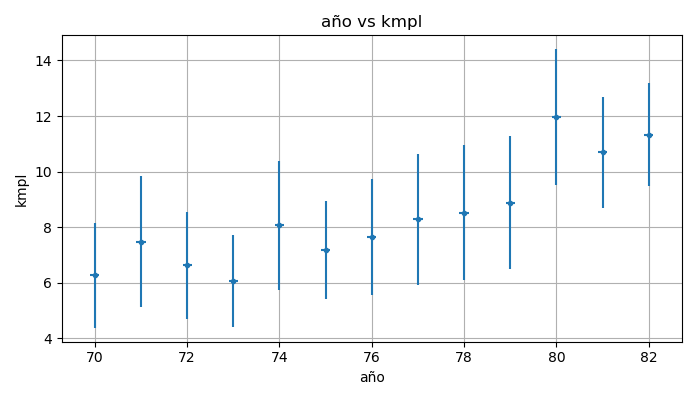

Text(0.5, 0, 'año')

In [20]:
#2 - año
avg_kmpl_year =df.groupby('model_year').mean()['kmpl']
std_kmpl_year =df.groupby('model_year').std()['kmpl']
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.set_title("año vs kmpl")
ax.grid()
x = avg_kmpl_year.index
ax.errorbar(x=x, y=avg_kmpl_year.values, xerr=0.1, yerr=std_kmpl_year.values, 
            fmt='.', elinewidth=None, ecolor=None, capsize=None)
ax.set_ylabel('kmpl')
ax.set_xlabel("año")

<IPython.core.display.Javascript object>


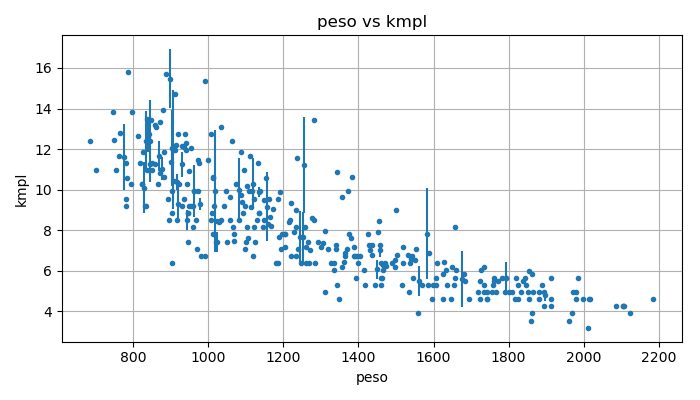

Text(0.5, 0, 'peso')

In [21]:
#2- peso
avg_kmpl_year =df.groupby('weight').mean()['kmpl']
std_kmpl_year =df.groupby('weight').std()['kmpl']
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.set_title("peso vs kmpl")
ax.grid()
x = avg_kmpl_year.index
ax.errorbar(x=x, y=avg_kmpl_year.values, xerr=0.1, yerr=std_kmpl_year.values,
            fmt='.', elinewidth=None, ecolor=None, capsize=None)
ax.set_ylabel('kmpl')
ax.set_xlabel("peso")

<IPython.core.display.Javascript object>


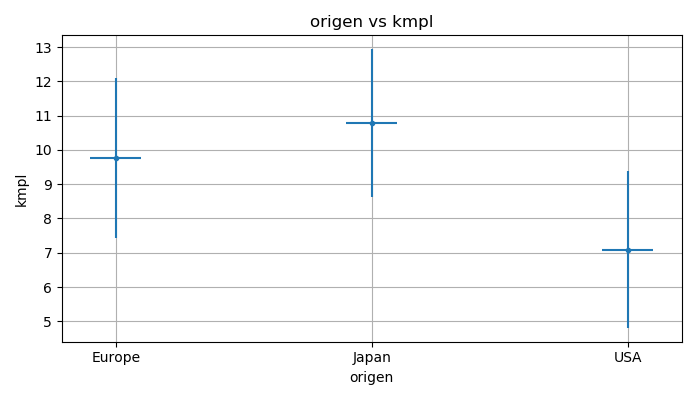

Text(0.5, 0, 'origen')

In [22]:
#2- origen
avg_kmpl =df.groupby('origin').mean()['kmpl']
std_kmpl =df.groupby('origin').std()['kmpl']
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.set_title("origen vs kmpl")
ax.grid()
x =  list(map(lambda origin:['Europe', 'Japan', 'USA'].index(origin),avg_kmpl.index))

ax.errorbar(x=x, y=avg_kmpl.values, xerr=0.1, yerr=std_kmpl.values,
            fmt='.', elinewidth=None, ecolor=None, capsize=None)

plt.xticks(x,avg_kmpl.index)
ax.set_ylabel('kmpl')
ax.set_xlabel("origen")

<IPython.core.display.Javascript object>


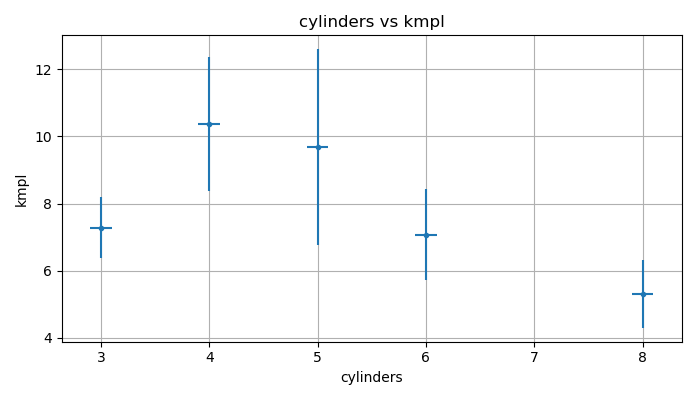

Text(0.5, 0, 'cylinders')

In [23]:
#2- cilindros
avg_kmpl =df.groupby('cylinders').mean()['kmpl']
std_kmpl =df.groupby('cylinders').std()['kmpl']
fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='w')
ax.set_title("cylinders vs kmpl")
ax.grid()
x =  avg_kmpl.index
ax.errorbar(x=x, y=avg_kmpl.values, xerr=0.1, yerr=std_kmpl.values,
            fmt='.', elinewidth=None, ecolor=None, capsize=None)
ax.set_ylabel('kmpl')
ax.set_xlabel("cylinders")

<IPython.core.display.Javascript object>


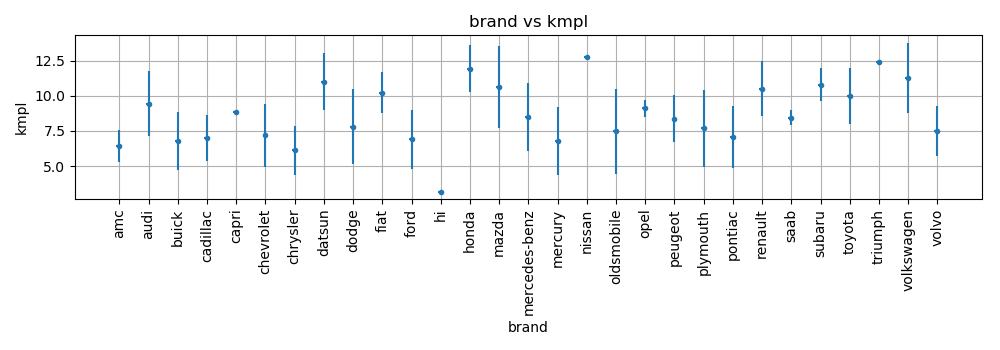

In [24]:
#2- brand
avg_kmpl =df.groupby('brand').mean()['kmpl']
std_kmpl =df.groupby('brand').std()['kmpl']

brands =  list(avg_kmpl.index)
x = list(map(lambda b: brands.index(b),avg_kmpl.index))
fig, ax = plt.subplots(figsize=(10, 3.5), tight_layout=True, facecolor='w')
ax.grid()
ax.errorbar(x=x, y=avg_kmpl.values, xerr=0.1, yerr=std_kmpl.values,
            fmt='.', elinewidth=None, ecolor=None, capsize=None)
ax.set_title("brand vs kmpl")
ax.set_ylabel('kmpl')
ax.set_xlabel("brand")
plt.xticks(x, brands,rotation=90)
plt.show()

### Gráficos interactivos

1. Construya una interfaz gráfica usando `ipywidgets` que permita seleccionar dos atributos y los gráfique como un *scatter plot*
    1. El primer atributo será el eje de abscisas y el segundo atributo el eje de ordenadas
    1. Ese el atributo de origen como el color de los marcadores
1. Los gráficos deben ser legibles, los ejes deben estar etiquetados, use leyenda para los marcadores

In [66]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
%matplotlib notebook

In [26]:
df.head()

kmpl  cylinders  displacement  horsepower  \
brand model                                                              
amc   ambassador brougham  4.6020          8         360.0       175.0   
      ambassador dpl       5.3100          8         390.0       190.0   
      ambassador sst       6.0180          8         304.0       150.0   
      concord              6.8676          6         232.0        90.0   
      concord              8.6022          4         151.0        90.0   

                                weight  acceleration  model_year origin  
brand model                                                              
amc   ambassador brougham  1624.475224          11.0          73    USA  
      ambassador dpl       1636.804400           8.5          70    USA  
      ambassador sst       1561.128768          11.5          72    USA  
      concord              1364.712240          17.2          78    USA  
      concord              1276.707432          20.1          80    USA

In [114]:
#df.index.get_level_values('brand').unique().name

options=list(df.iloc[1].index)

def plot_update(x,y):
    fig, ax = plt.subplots(figsize=(7, 4), tight_layout=True, facecolor='c')
    ax.set_title("{0} vs {1}".format(x,y))
    ax.grid()
    p_x = df.loc[:,x].values
    p_y = df.loc[:,y].values
    ax.scatter(x=p_x, y=p_y)
    display(ax)

widgets.interact(plot_update, y=options,x=options);

interactive(children=(Dropdown(description='x', options=('kmpl', 'cylinders', 'displacement', 'horsepower', 'w…